<a href="https://colab.research.google.com/github/DavideScassola/PML2024/blob/main/Notebooks/02_numpy_pandas_sklearn/023_scikit_learn_exercise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

1) Import the diabetes database and show the input and output in a Pandas dataframe

In [14]:
from sklearn import datasets

data = datasets.load_diabetes()

In [15]:
data

{'data': array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
          0.01990749, -0.01764613],
        [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
         -0.06833155, -0.09220405],
        [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
          0.00286131, -0.02593034],
        ...,
        [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
         -0.04688253,  0.01549073],
        [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
          0.04452873, -0.02593034],
        [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
         -0.00422151,  0.00306441]]),
 'target': array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
         69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
         68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
         87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
        259.,  53., 190., 142.,  75., 142., 155., 225.,  59

2) Visualize the multiple pairwise bivariate distributions in the dataset (use the .pairplot() function of seaborn) 

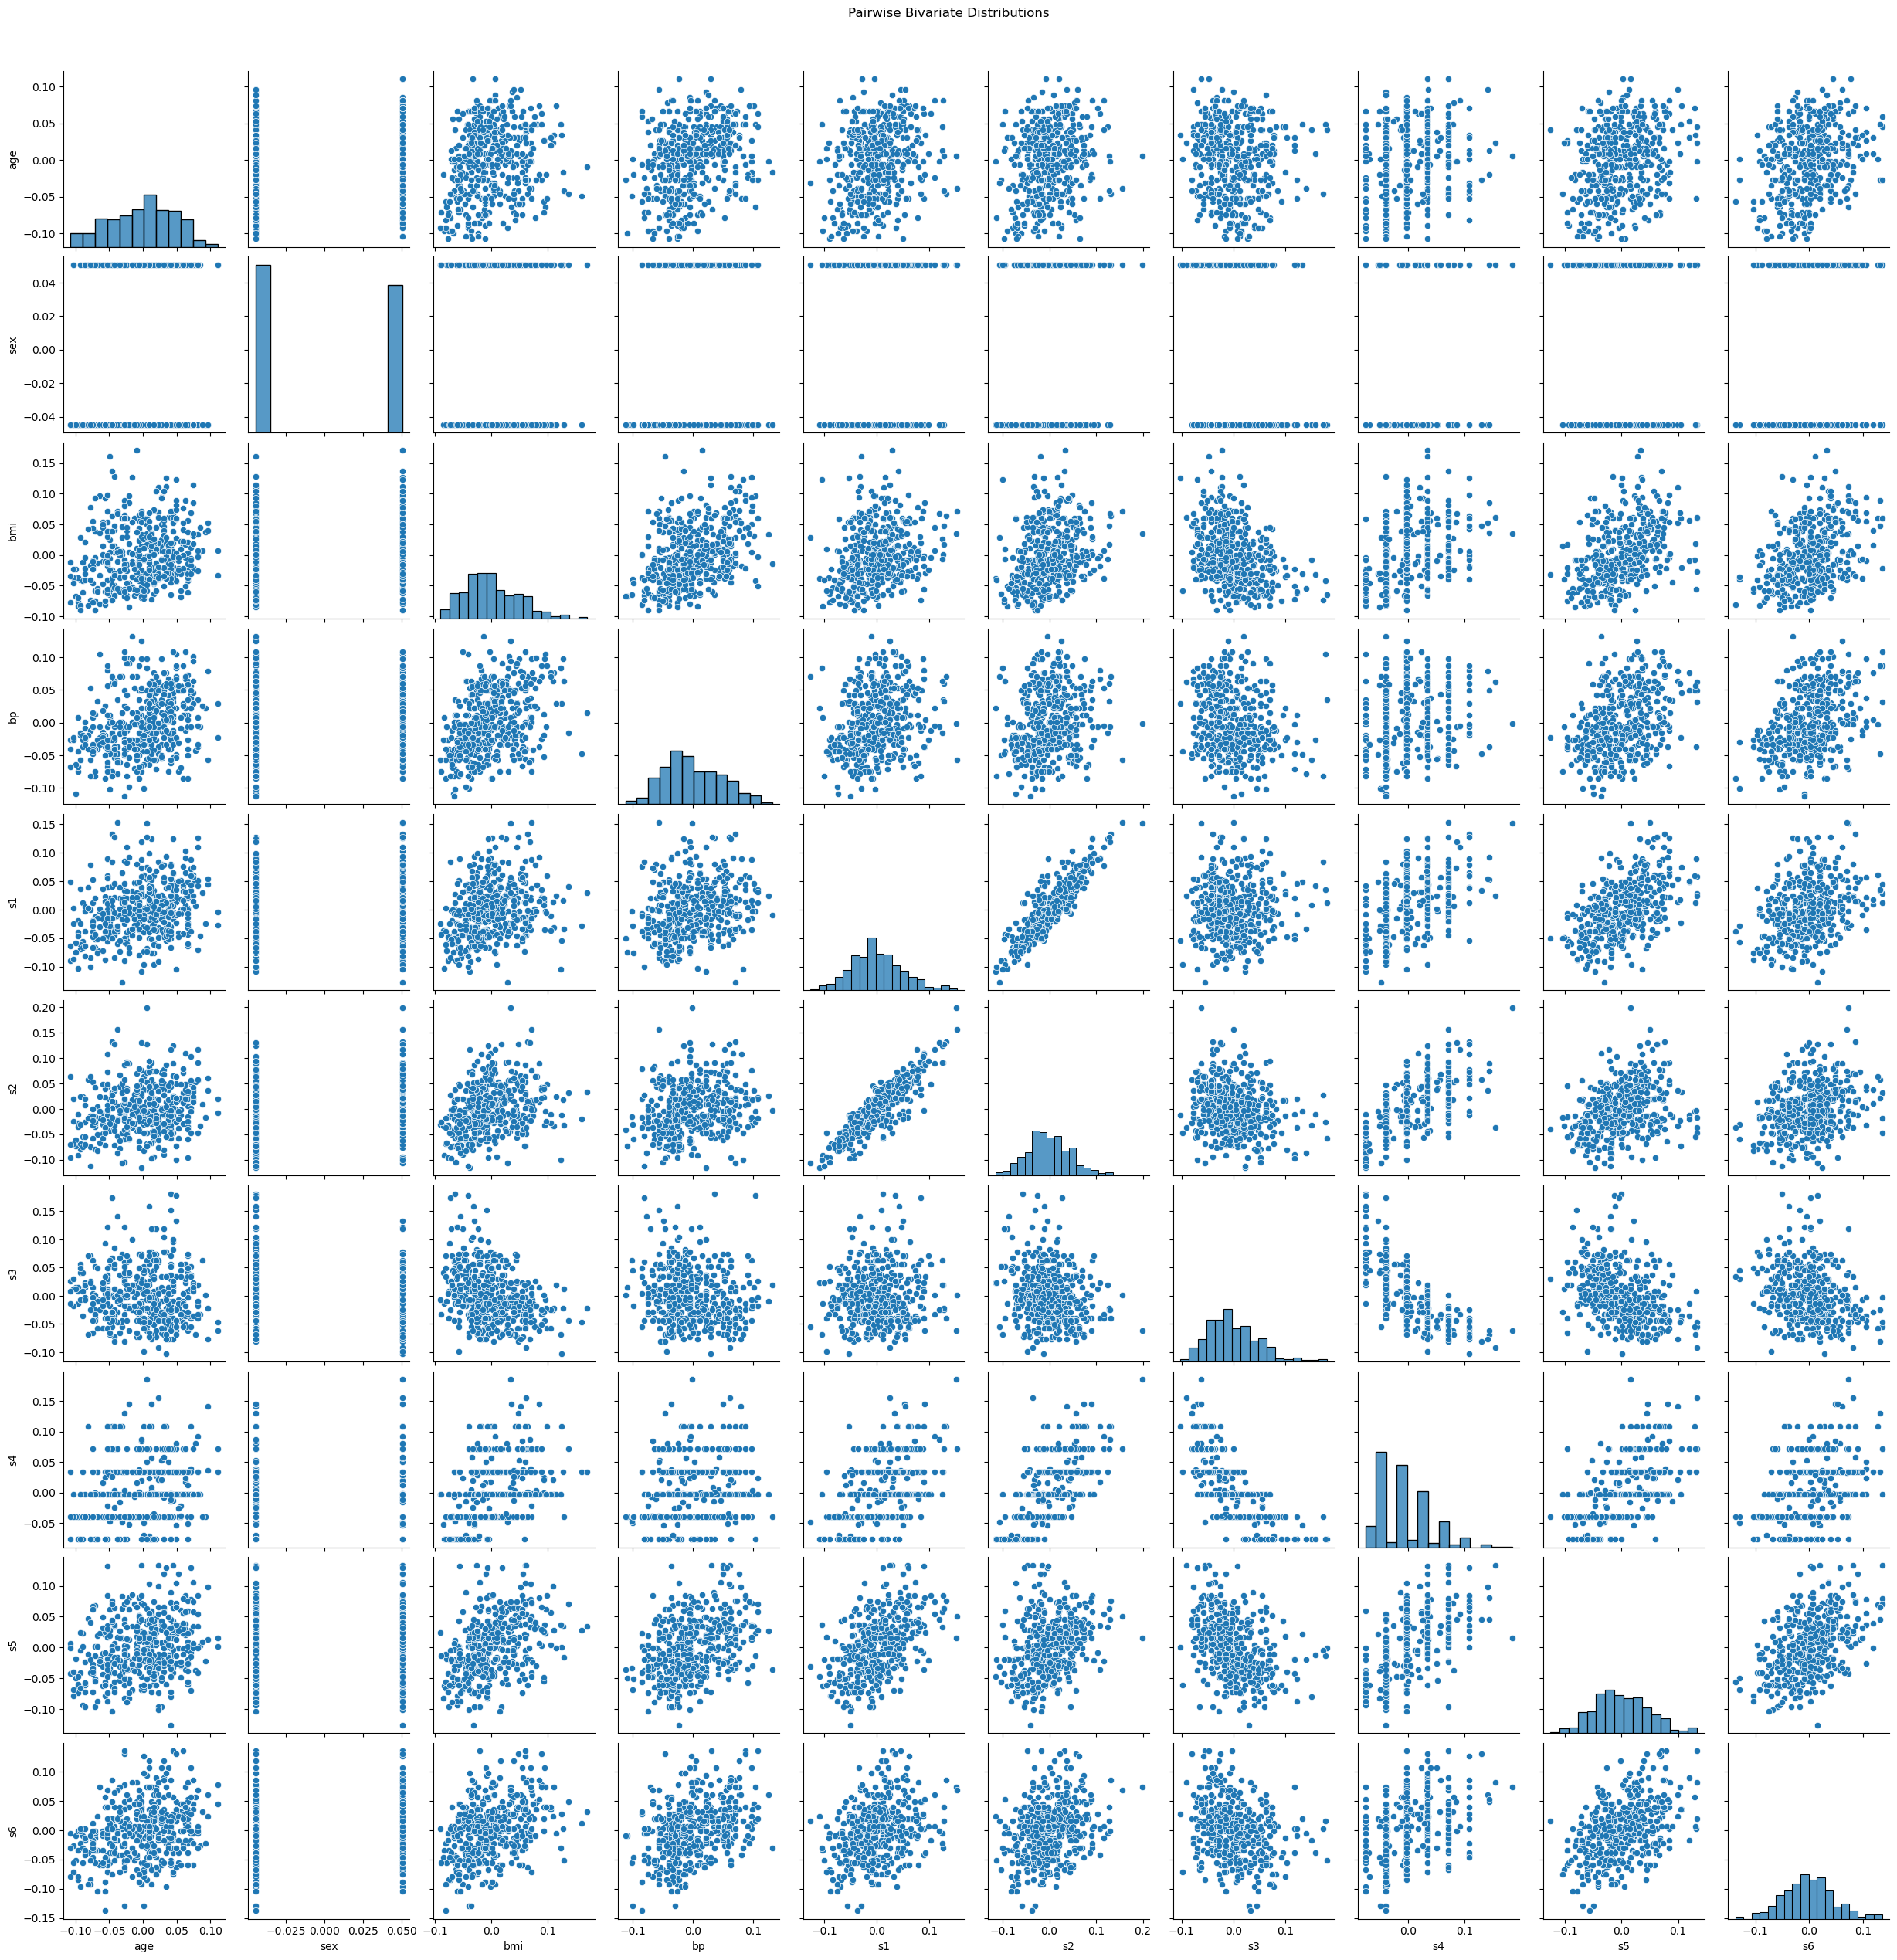

In [16]:
# Convert the data into a DataFrame for easier manipulation
diabetes = pd.DataFrame(data['data'], columns=data['feature_names'])

# Visualize pairwise bivariate distributions using pairplot
sns.pairplot(diabetes)
plt.suptitle("Pairwise Bivariate Distributions", y=1.02)  # Add a title with some space
plt.show()

3) Split it in train and test sets (20% of the data must be in the test)

In [18]:
from sklearn.model_selection import train_test_split

# Convert the data into a DataFrame for easier manipulation
features = pd.DataFrame(data['data'], columns=data['feature_names'])
target = data['target']

# Split the data into train and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Check the shape of the split datasets
print(f"Training data shape: {X_train.shape}")
print(f"Test data shape: {X_test.shape}")

Training data shape: (353, 10)
Test data shape: (89, 10)


4. Perform classic standardisation

In [19]:
from sklearn import preprocessing

# Initialize the StandardScaler
scaler = preprocessing.StandardScaler()

# Fit and transform the training data
X_train_scaled = scaler.fit_transform(X_train)

# Transform the test data using the same scaler (important to use fit_transform on training data only)
X_test_scaled = scaler.transform(X_test)

# Check the mean and standard deviation of the transformed training data
print("Training data (scaled):")
print("Mean of each feature:", X_train_scaled.mean(axis=0))
print("Standard deviation of each feature:", X_train_scaled.std(axis=0))

Training data (scaled):
Mean of each feature: [ 2.76769479e-17  9.12081238e-17 -6.69907944e-17  3.33381418e-17
 -2.67334156e-17 -1.79271140e-17  4.40315081e-17  1.82730758e-16
  1.77698586e-17 -5.75947851e-17]
Standard deviation of each feature: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


5. Fit a linear regression model and print the coefficient of determination (R2) of the prediction

In [21]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Fit the linear regression model
model = LinearRegression()

# Train the model on the scaled training data
model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test_scaled)

In [22]:
# Calculate the coefficient of determination (R2 score)
r2 = model.score(X_test_scaled, y_test)  # This method returns the R2 score directly

# Print the R2 score
print(f"Coefficient of determination (R²) on test data: {r2:.4f}")

Coefficient of determination (R²) on test data: 0.4526


6. Plot the real (on x-axis) vs predicted (on y-axis) outcomes together with a reference bisector line

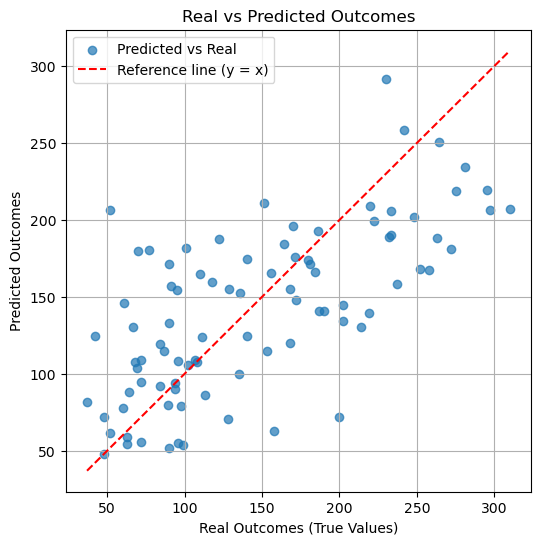

In [23]:
import matplotlib.pyplot as plt
import numpy as np

# Plot real vs predicted outcomes
plt.figure(figsize=(6, 6))

# Scatter plot of real vs predicted values
plt.scatter(y_test, y_pred, alpha=0.7, label='Predicted vs Real')

# Plot the reference bisector line (y = x)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', label="Reference line (y = x)")

# Labels and title
plt.xlabel('Real Outcomes (True Values)')
plt.ylabel('Predicted Outcomes')
plt.title('Real vs Predicted Outcomes')
plt.legend()

# Show plot
plt.grid(True)
plt.show()
